In [7]:
import matplotlib
import matplotlib.pyplot as plt
import torch
%matplotlib inline
import tqdm
import numpy as np
from JulienNet import JulienNet

import torchvision
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import random

In [8]:
dropout = True


In [9]:
from JulienNet import SetGenerator
CIFAR_10_Generator = SetGenerator(100,100)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


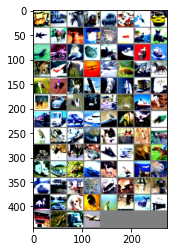

In [10]:
plt.imshow(CIFAR_10_Generator.show_random())

In [ ]:
from JulienNet import JNetTrainer
Trainer = JNetTrainer(CIFAR_10_Generator,200,dropout,'')
Trainer.train()
# Trainer.load('Jnet.pth')

cuda:0


  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\jngt\anaconda3\envs\UoA-DL\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
[16, 1.0], loss: 2.298398160934448\%:   8%|▊         | 15/200 [08:51<1:46:02, 34.39s/it]               

In [ ]:
fig,ax=plt.subplots(2,1)
ax[0].plot(Trainer.train_loss_list,color='k')
ax[0].plot(Trainer.val_loss_list,color='g')

ax[0].set(title="Loss",xlabel="n_epochs",ylabel="loss")


ax[1].plot(Trainer.train_accuracy_list,color='b')
ax[1].plot(Trainer.val_accuracy_list,color='r')
ax[1].set(title="Accuracy",xlabel="n_epochs",ylabel="accuracy")
fig.savefig("Outputs/augmented.png")

In [7]:
import seaborn as sns

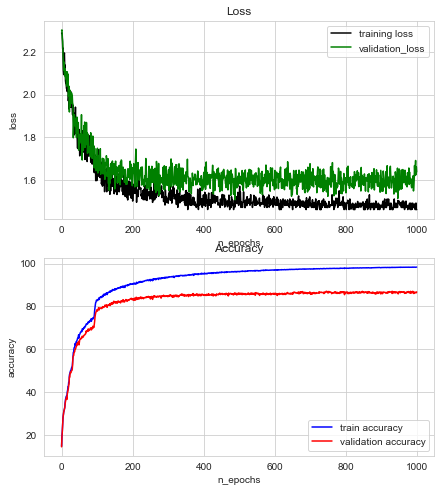

In [8]:
sns.set_style('whitegrid')
train_loss_do = np.load('training models/Dropout/training_loss.npy')
train_acc_do = np.load('training models/Dropout/training_accuracy.npy')
val_loss_do = np.load('training models/Dropout/val_loss.npy')
val_acc_do = np.load('training models/Dropout/val_accuracy.npy')

fig,ax=plt.subplots(2,1,figsize=(7,8))
ax[0].plot(train_loss_do,color='k')
ax[0].plot(val_loss_do,color='g')

ax[0].set(title="Loss",xlabel="n_epochs",ylabel="loss")
ax[0].legend(['training loss','validation_loss'])


ax[1].plot(train_acc_do,color='b')
ax[1].plot(val_acc_do,color='r')
ax[1].set(title="Accuracy",xlabel="n_epochs",ylabel="accuracy")
ax[1].legend(['train accuracy','validation accuracy'])

# plt.savefig('Outputs/dr.png')

In [9]:
# np.save('training models/Nodropout/training_accuracy',Trainer.train_accuracy_list)
# np.save('training models/Nodropout/val_accuracy',Trainer.val_accuracy_list)
# np.save('training models/Nodropout/training_loss',Trainer.train_loss_list)
# np.save('training models/Nodropout/val_loss',Trainer.val_loss_list)

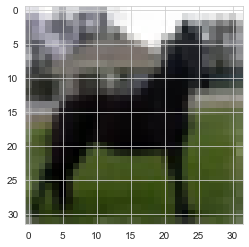

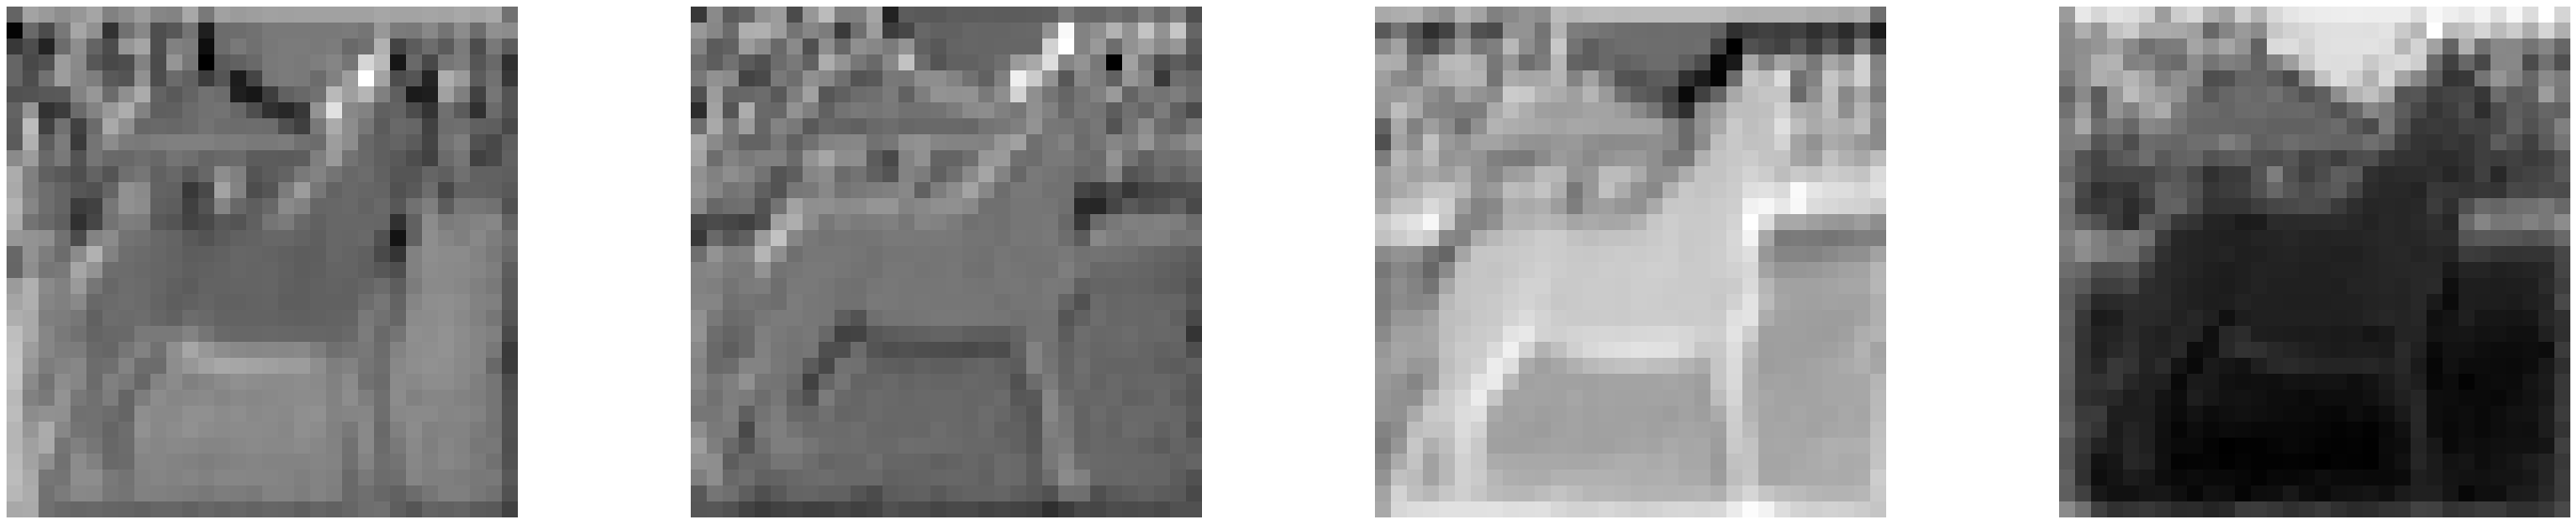

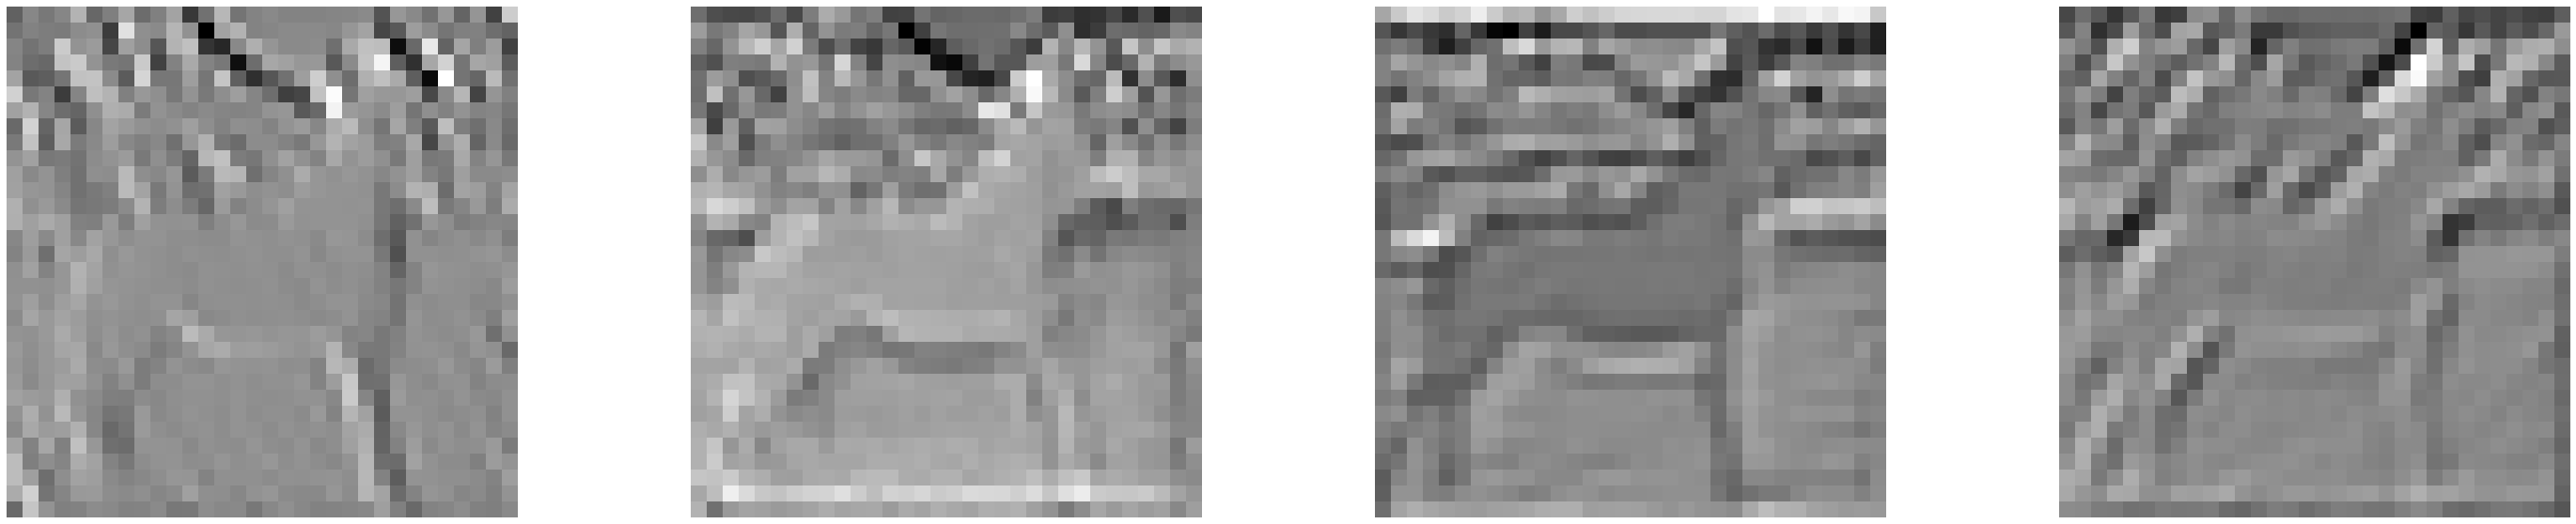

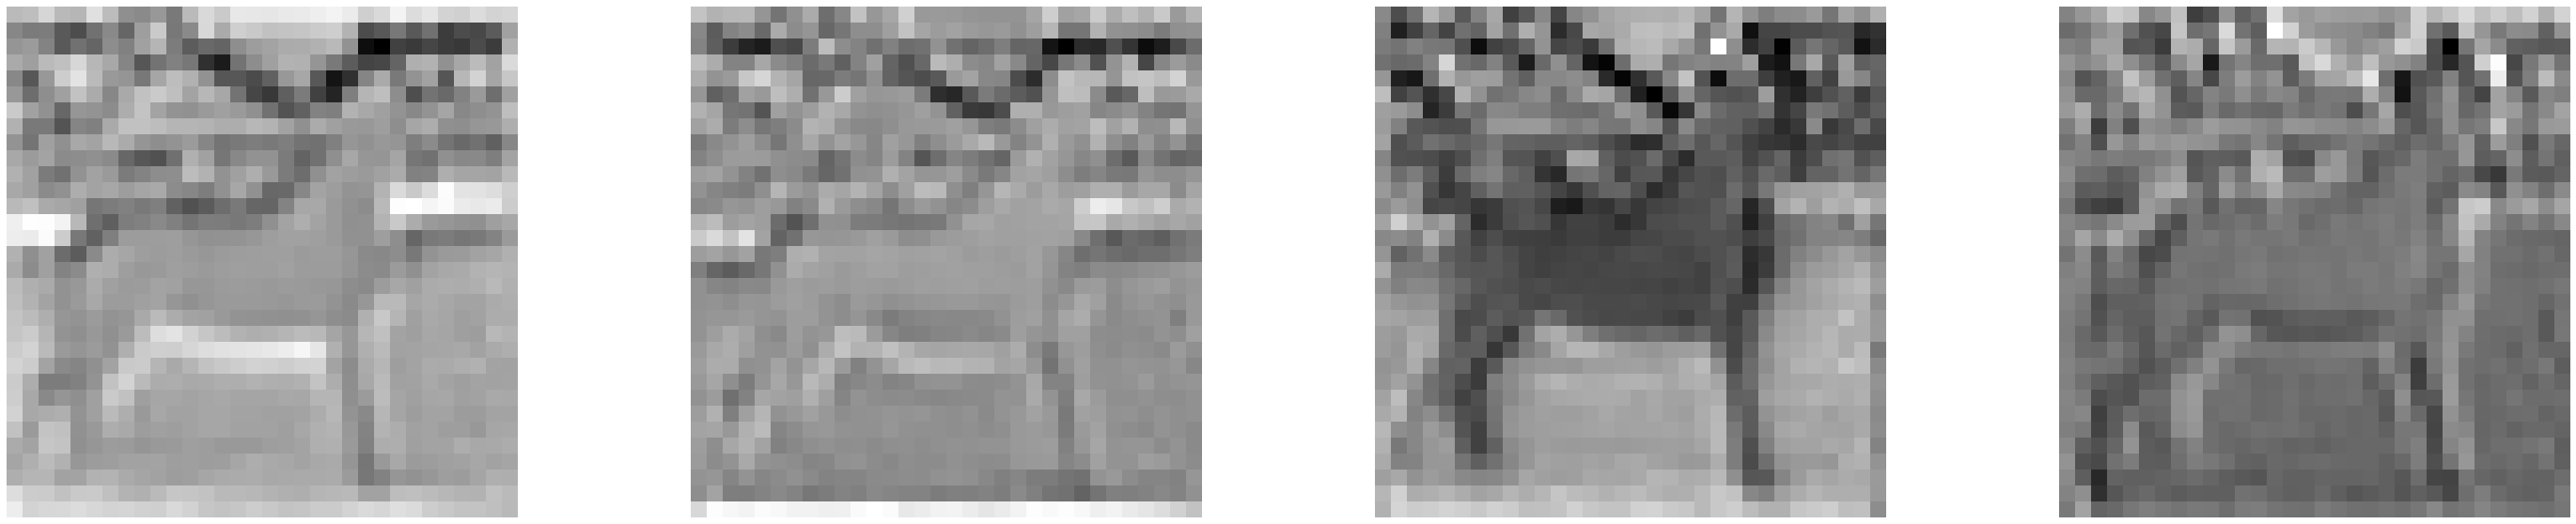

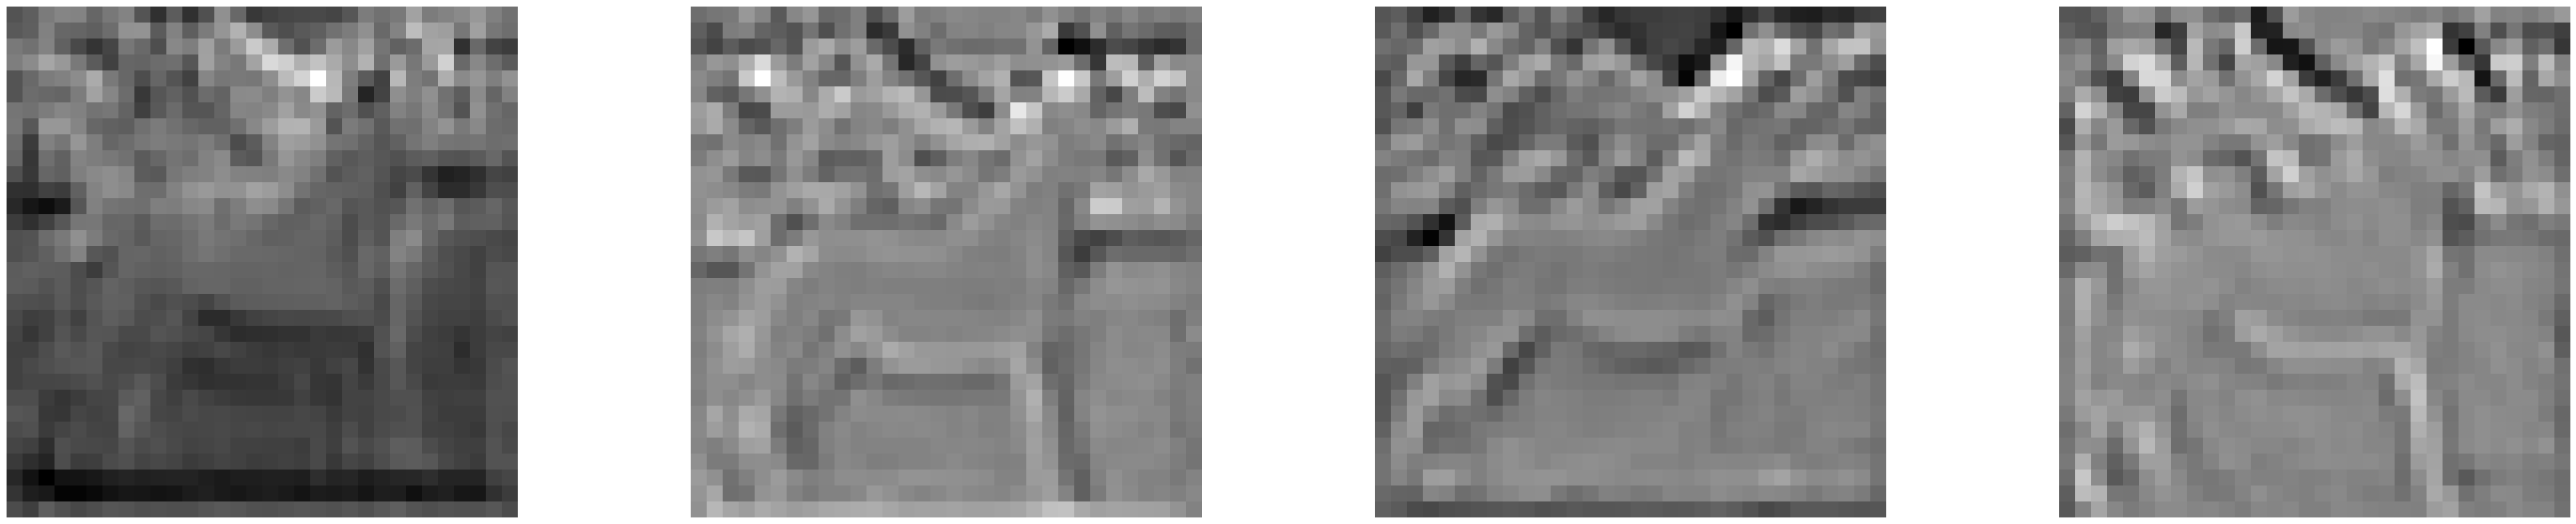

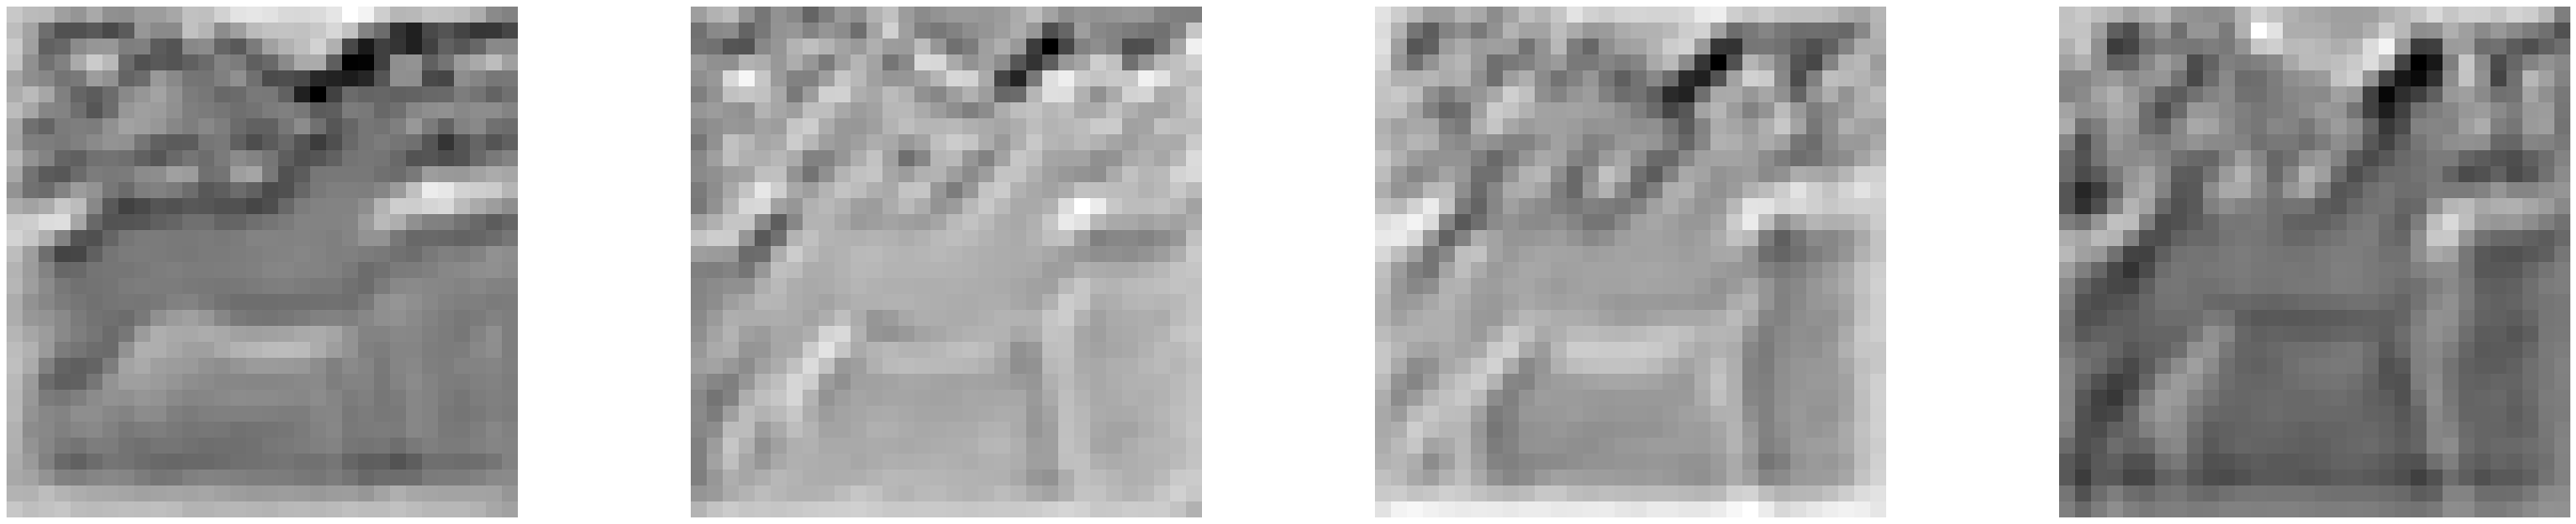

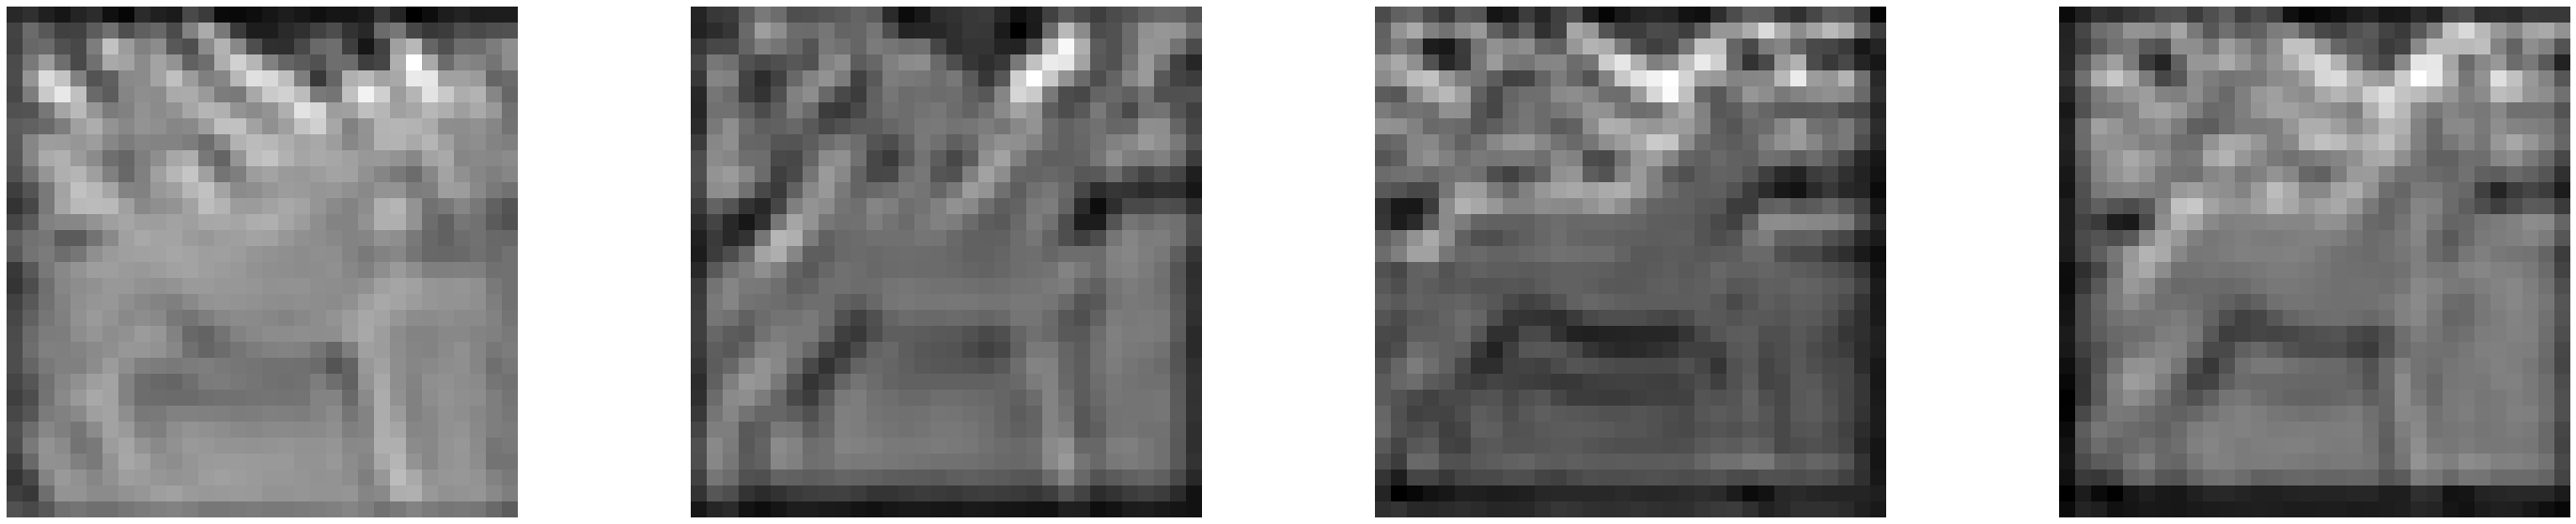

In [14]:
# Trainer.load('Jnet.pth')
net = Trainer.net

no_of_layers=0
conv_layers=[]
 
model_children=list(net.children())
 
for child in model_children:
  if type(child)==torch.nn.Conv2d:
    no_of_layers+=1
    conv_layers.append(child)
  elif type(child)==torch.nn.Sequential:
    for layer in child.children():
      if type(layer)==torch.nn.Conv2d:
        no_of_layers+=1
        conv_layers.append(layer)

img = Trainer.SetGenerator.training_set[random.randint(9,len(Trainer.SetGenerator.training_set))][0]

plt.imshow(Trainer.SetGenerator.imshow(torchvision.utils.make_grid(img)))

img= img.view(1,3,32,32).to(Trainer.device)

results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results



for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
#     print("Layer ",num_layer+1)
#     filters=[]
    for i, filter in enumerate(layer_viz):
#         filters.append(filter)
        if i == 4: 
            break
        plt.subplot(1, 4, i + 1)
        plt.imshow(filter.cpu(), cmap='gray')
        plt.axis("off")

In [11]:
Trainer.predict(img)

C:\Users\jngt\anaconda3\envs\UoA-DL\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


'plane'

['plane', 0.873, 1.0, 0.873, 0.9321943406300054]
['car', 0.943, 1.0, 0.943, 0.970663921770458]
['bird', 0.77, 1.0, 0.77, 0.8700564971751412]
['cat', 0.699, 1.0, 0.699, 0.8228369629193644]
['deer', 0.848, 1.0, 0.848, 0.9177489177489178]
['dog', 0.807, 1.0, 0.807, 0.8931931377974545]
['frog', 0.929, 1.0, 0.929, 0.9631933644375325]
['horse', 0.887, 1.0, 0.887, 0.9401165871754107]
['ship', 0.91, 1.0, 0.91, 0.9528795811518325]
['truck', 0.924, 1.0, 0.924, 0.9604989604989606]
0.859


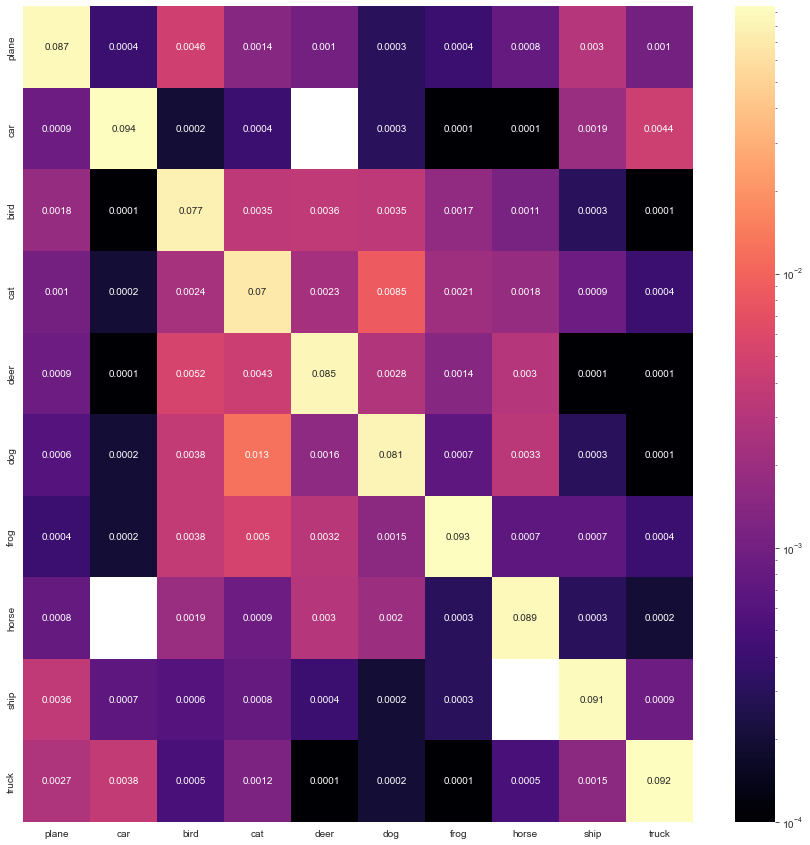

In [12]:
fig=Trainer.get_metrics()
fig.savefig('Outputs/Confusion.png')

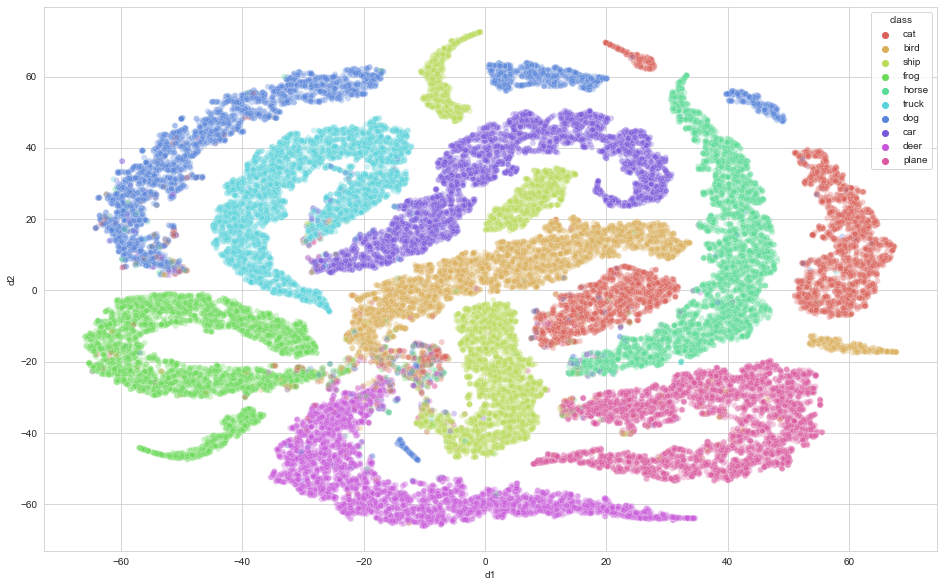

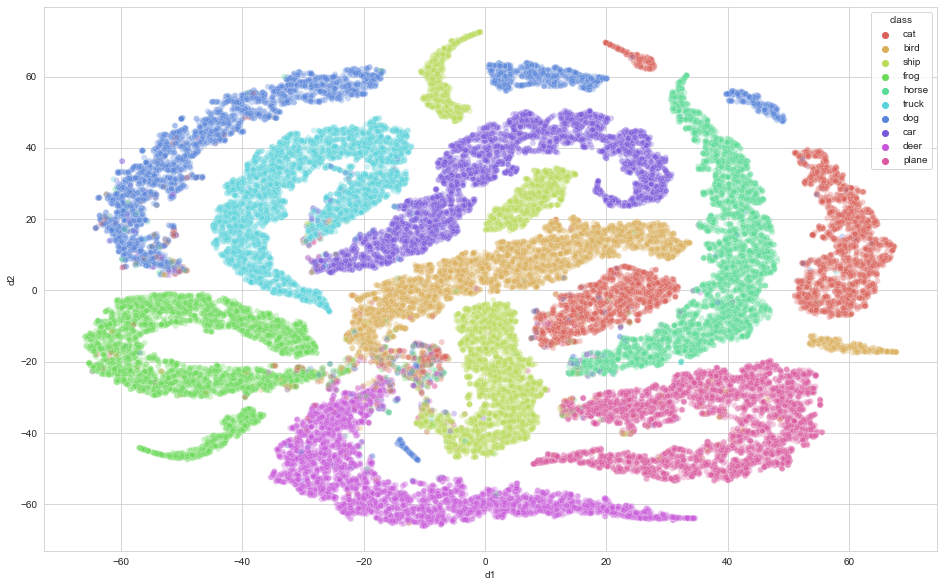

In [15]:
Trainer.get_feature_reduction()

# Other models

In [23]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
vgg19 = models.vgg19(pretrained=True)
densenet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)

# Visualizing the data


In [105]:
def imshow(img):
  fig,ax=plt.subplots(figsize=(15,5))  
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()   # convert from tensor
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 


Files already downloaded and verified


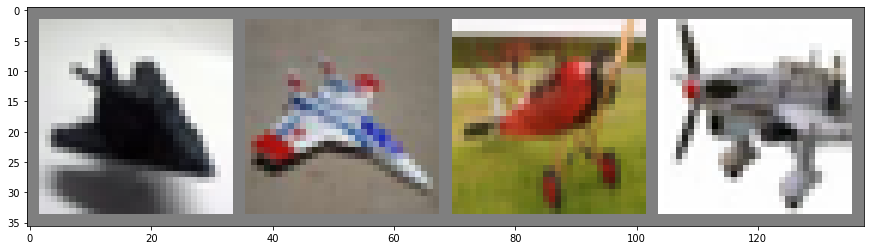

In [106]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==0
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/planes_sample.png')

Files already downloaded and verified


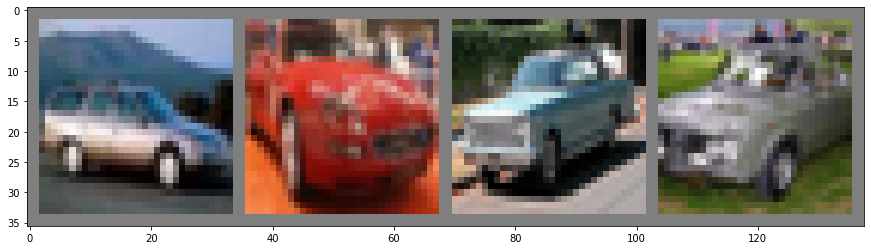

In [107]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==1
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/car_sample.png')

Files already downloaded and verified


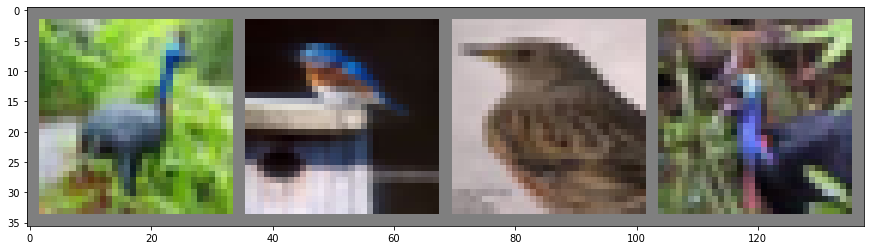

In [108]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==2
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/cird_sample.png')

Files already downloaded and verified


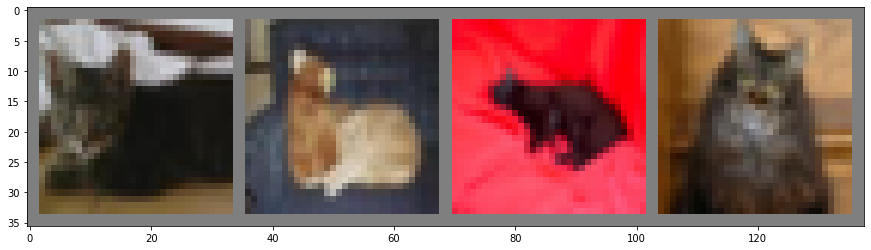

In [109]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==3
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/cat_sample.png')

Files already downloaded and verified


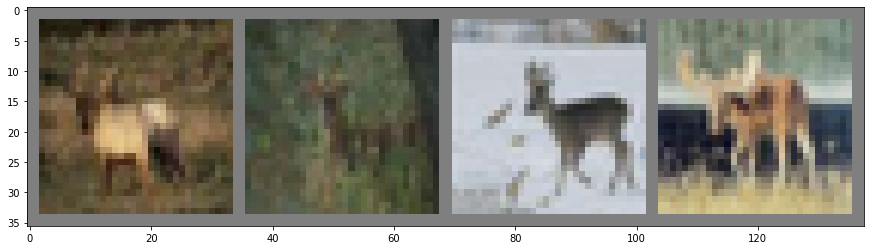

In [110]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==4
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/deer_sample.png')

Files already downloaded and verified


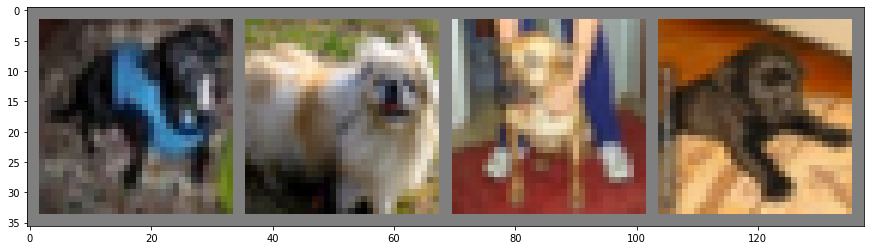

In [111]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==5
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/dog_sample.png')

Files already downloaded and verified


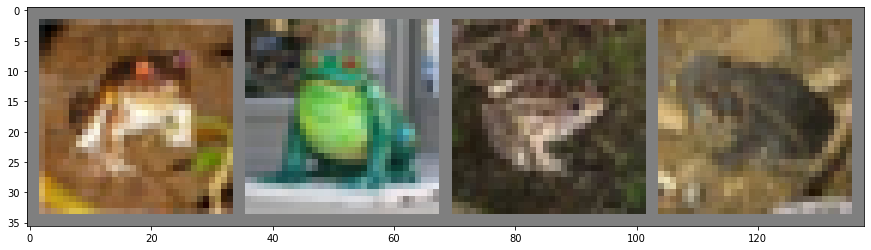

In [112]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==6
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/frog_sample.png')

Files already downloaded and verified


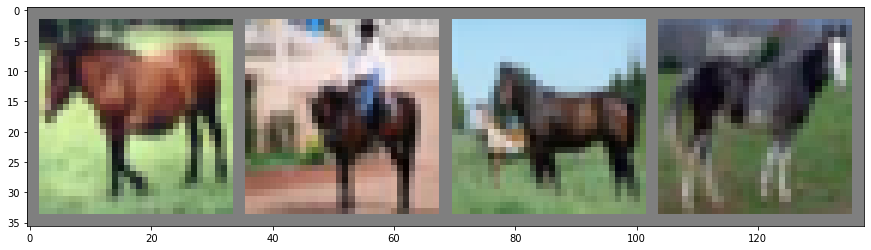

In [113]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==7
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/horse_sample.png')

Files already downloaded and verified


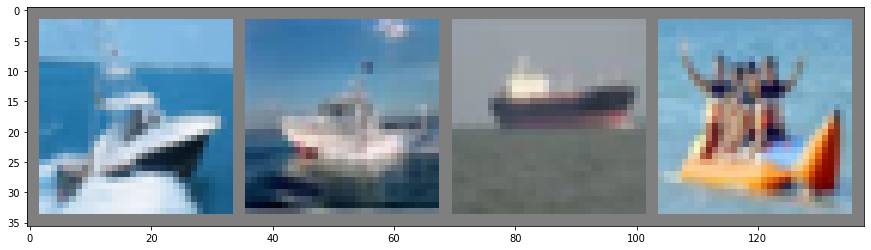

In [114]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==8
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/boat_sample.png')

Files already downloaded and verified


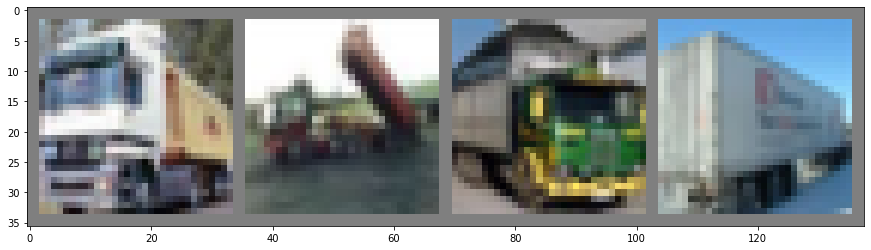

In [115]:
transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = dataset.CIFAR10(root='.\\data',
download=True, transform=transform)
idx = torch.tensor(trainset.targets)==9
frogs = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])


trainloader = torch.utils.data.DataLoader(frogs,
    batch_size=4, shuffle=False, num_workers=1)

imgs, lbls = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))

plt.savefig('Outputs/truck_sample.png')

In [116]:
import pandas as pd
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
df=pd.DataFrame(np.array(CIFAR_10_Generator.training_set.targets),columns=['class'])
df['class'] = df['class'].apply(lambda x:classes[x])

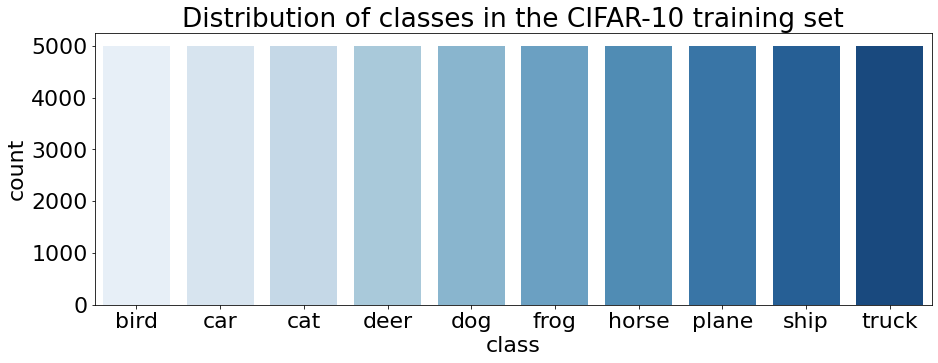

In [119]:
import seaborn as sns
matplotlib.rcParams.update({'font.size': 22})
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=df.reset_index().groupby('class').count().reset_index(),x='class',y='index',palette='Blues')
ax.set(title='Distribution of classes in the CIFAR-10 training set',ylabel="count")
fig.savefig('Outputs/Distribution.png')

In [95]:
df

,class
0,frog
1,truck
2,truck
3,deer
4,car
...,...
49995,bird
49996,frog
49997,truck
49998,car


In [ ]:
sns.barplot(data=df.groupby('class').count().reset_index())